<a href="https://colab.research.google.com/github/Joe-AI1/Diabetes_predict_colab/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 1. Load Data
df = pd.read_csv('/content/drive/MyDrive/Ai_technology/diabetes.csv')
print("ตัวอย่างข้อมูล:\n", df.head())


ตัวอย่างข้อมูล:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# 2. เตรียมข้อมูล
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [ ]:
# 3. Normalize ข้อมูล (0-1)
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
# 4. แยกข้อมูล Train-Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [ ]:
# 5. สร้างโมเดล Neural Network (ANN)
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))  # ชั้นซ่อน (Hidden Layer) 16 units
model.add(Dense(8, activation='relu'))  # ชั้นซ่อนอีกชั้น
model.add(Dense(1, activation='sigmoid'))  # Output สำหรับ Binary Classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 7. เทรนโมเดล พร้อมแสดง Progress Bar (Epoch)
history = model.fit(x_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(x_test, y_test),
    verbose=1  )

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6294 - loss: 0.6894 - val_accuracy: 0.6656 - val_loss: 0.6803
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6468 - loss: 0.6822 - val_accuracy: 0.6656 - val_loss: 0.6709
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6438 - loss: 0.6752 - val_accuracy: 0.6656 - val_loss: 0.6642
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6558 - loss: 0.6668 - val_accuracy: 0.6688 - val_loss: 0.6573
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6031 - loss: 0.6783 - val_accuracy: 0.6688 - val_loss: 0.6532
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6354 - loss: 0.6649 - val_accuracy: 0.6688 - val_loss: 0.6494
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6488 - loss: 0.6565 - val_accuracy: 0.6688 - val_loss: 0.6471
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6361 - loss: 0.6610 - val_accuracy: 0.6688 

In [ ]:
# 8. สรุปผล Training (Loss, Accuracy)
print("\nสรุปผล Training:")
final_loss, final_acc = model.evaluate(x_test, y_test)
print(f"Loss: {final_loss:.4f}, Accuracy: {final_acc:.4f}")


สรุปผล Training:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.4924 
Loss: 0.4627, Accuracy: 0.7857


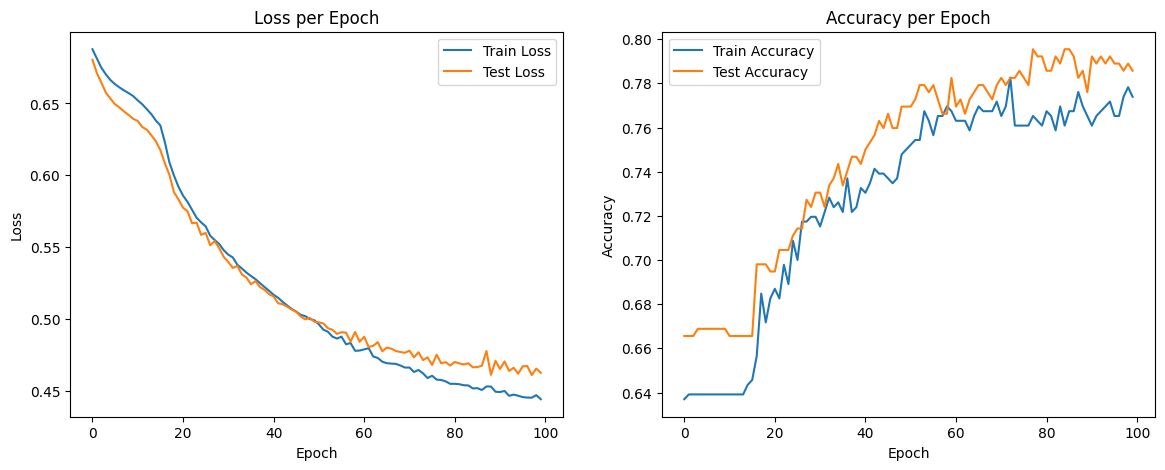

In [ ]:
# 9. แสดงกราฟ Loss และ Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 10. ประเมินผล (Confusion Matrix, Report)
y_pred_prob = model.predict(x_test)  # ได้ค่า probability
y_pred = (y_pred_prob > 0.5).astype(int)  # ตัดเกณฑ์ 0.5 เป็น 0/1

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.68      0.66      0.67       102

    accuracy                           0.79       308
   macro avg       0.76      0.75      0.76       308
weighted avg       0.78      0.79      0.78       308


Confusion Matrix:
 [[175  31]
 [ 35  67]]


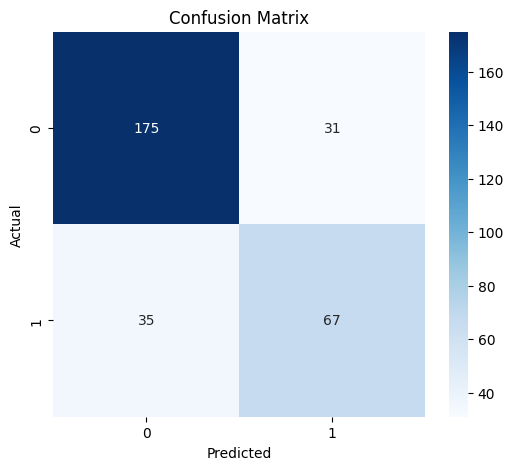

In [ ]:
# 11. วาด Heatmap Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()